# Tutorial : Coins detection
## Setup

In [8]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy import ndimage

%matplotlib nbagg

## Open the file

In [9]:
im = Image.open('_data/coins.jpg')
channels = im.split()
r = np.array(channels[0])

## Plot the histogram
A histogram represents the distribution of the pixels population according to their value or lightness.<br>
We can distinguish two population of pixels on the histogram, the desk and the coins.

<IPython.core.display.Javascript object>


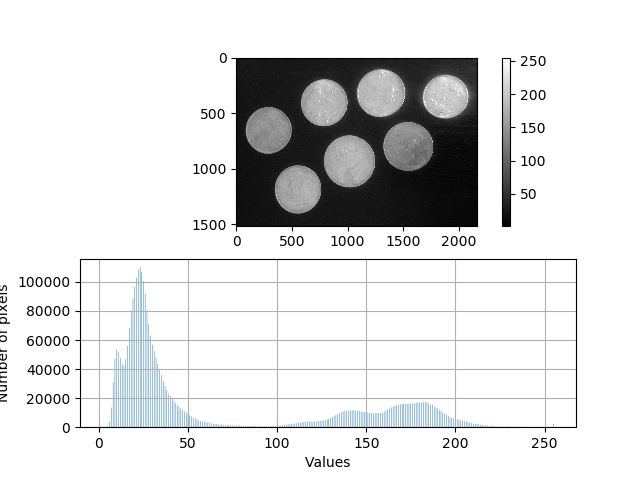

In [10]:
fig = plt.figure("Rupees on the desk")
plt.clf()
fig.add_subplot(2, 1, 1)
plt.imshow(r, origin = "upper", cmap = cm.gray)
plt.colorbar()
fig.add_subplot(2, 1, 2)
plt.ylabel('Number of pixels')
plt.xlabel('Values')
plt.hist(r.flatten(), bins=1000, histtype = "stepfilled")
plt.grid()
plt.show()

# Thresholding
From the red channel, thresholding is used to create a binary image composed by 0 and 1.
<br>Now the desk is represented by zeros and coins by ones.

<IPython.core.display.Javascript object>


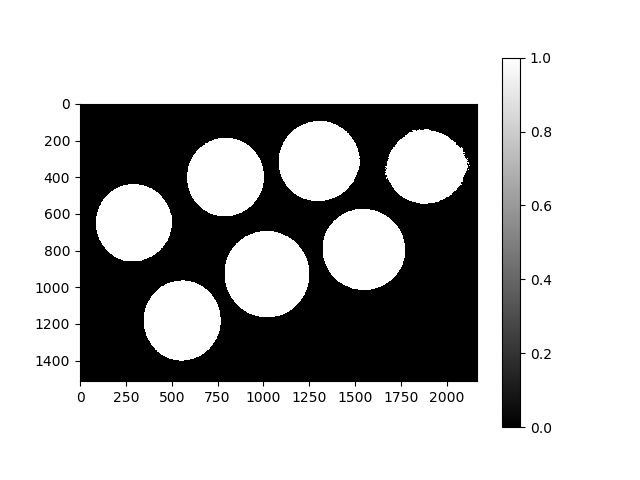

In [11]:
thres = 80.
imt = r > thres

fig = plt.figure("Thresholding")
plt.imshow(imt, origin = "upper", cmap = cm.gray)
plt.colorbar()
plt.show()

## Erosion and labeling

<IPython.core.display.Javascript object>


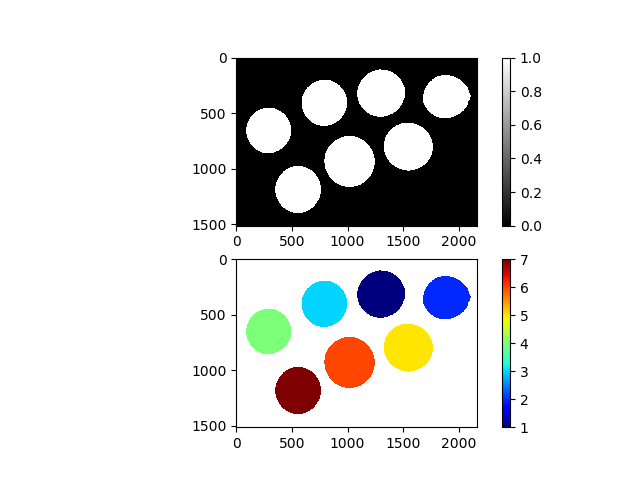

I have 7 coins on my desk


In [12]:
erod = ndimage.morphology.binary_erosion(imt, structure=np.ones((10,10)))
lab, number = ndimage.measurements.label(erod) # On compte les zones
lab = np.where(lab == 0, np.nan, lab)

fig = plt.figure("Region labeling")

fig.add_subplot(2, 1, 1)
plt.imshow(erod, origin = "upper", cmap = cm.gray)
plt.colorbar()

fig.add_subplot(2, 1, 2)
plt.imshow(lab, origin = "upper", cmap = cm.jet)
plt.colorbar()
plt.show()

print ("I have",number,"coins on my desk")

## Edge detection with the Sobel Filter

<IPython.core.display.Javascript object>


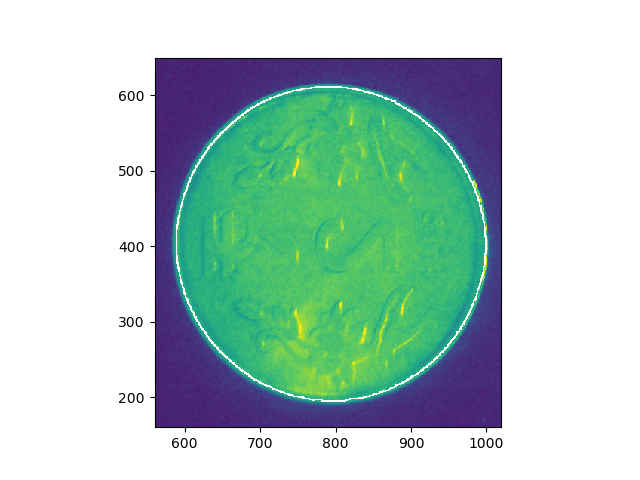

In [13]:
sobx = ndimage.sobel(erod, axis=0, mode='constant')
soby = ndimage.sobel(erod, axis=1, mode='constant')
sob = np.hypot(zgx, zgy)

fig = plt.figure("Sobel–Feldman operator")
plt.imshow(np.where(sob > 0 , np.nan, r), origin = "upper")
plt.xlim((560, 1020))
plt.ylim((160, 650))
plt.show()